In [1]:
import numpy as np
import pandas as pd

In [3]:
data=pd.read_csv('version_C.csv')

In [7]:
data.columns

Index(['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'age', 'garage',
       'fireplace', 'renovated', 'neighborhood', 'distance_city', 'price',
       'price_hilo'],
      dtype='object')

Question 1

In [86]:
from sklearn.model_selection import train_test_split
houses=pd.read_csv('version_C.csv')
y = houses.price
X = houses.drop(['price','price_hilo'], axis = 1)
y_binned = pd.qcut(y, q = 100)
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=617, 
                                                    train_size=0.7, 
                                                    stratify=y_binned)

In [12]:
np.mean(X_train.lot_size)

3991.2423861852435

In [20]:
np.mean(X_train[(X_train.bedrooms>=2) & (X_train.neighborhood==1)]['distance_city'])

6.4345047228955945

In [22]:
X_train.groupby(by='bedrooms',as_index=False).agg({'lot_size':'median'})

,bedrooms,lot_size
0,1,3381.5
1,2,3199.0
2,3,3238.0
3,4,3248.0
4,5,3223.0
5,6,3277.0


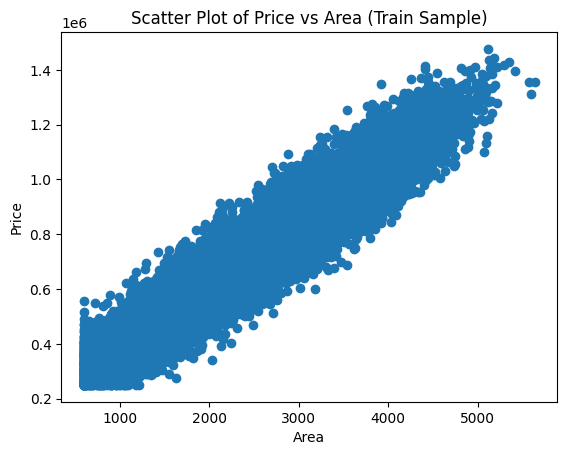

In [23]:
import matplotlib.pyplot as plt

train = X_train.assign(price = y_train)
test = X_test.assign(price = y_test)

plt.figure()
plt.scatter(train['area'], train['price'])
plt.xlabel('Area')
plt.ylabel('Price')
plt.title('Scatter Plot of Price vs Area (Train Sample)')
plt.show()

In [26]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'age', 'garage',
       'fireplace', 'renovated', 'neighborhood', 'distance_city', 'price'],
      dtype='object')

In [27]:
from statsmodels.formula.api import ols

model=ols('price ~ bedrooms + bathrooms+ area+ lot_size+floors+ age+ garage+fireplace+ renovated+ neighborhood+ distance_city',data=train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                 3.057e+04
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:45:13   Log-Likelihood:            -2.3374e+05
No. Observations:               19110   AIC:                         4.675e+05
Df Residuals:                   19098   BIC:                         4.676e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept       1.02e+05   2553.556     39.931      0.000     9.7e+04    1.07e+05
bedrooms       1.149e+04    891.486     12.890      0.000    9744.223    1.32e+04
bathrooms      1.396e+04    894.516     15.607      0.000    1.22e+04    1.57e+04
area            198.5252      0.903    219.803      0.000     196.755     200.296
lot_size         10.2165      0.146     70.187      0.000       9.931      10.502
floors         -243.0591    612.823     -0.397      0.692   -1444.247     958.128
age             -10.9259     11.181     -0.977      0.328     -32.842      10.990
garage          2.06e+04    833.511     24.710      0.000     1.9e+04    2.22e+04
fireplace      9093.8387    718.293     12.660      0.000    7685.921    1.05e+04
renovated      2.539e+04    944.834     26.874      0.000    2.35e+04    2.72e+04
neighborhood   5.071e+04   1123.488     45.138      0.000    4.85e+04    5.29e+04
distance_city -4883.4662     88.407    -55.238      0.000   -5056.752   -4710.180
==============================================================================
Omnibus:                        0.228   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.892   Jarque-Bera (JB):                0.247
Skew:                           0.004   Prob(JB):                        0.884
Kurtosis:                       2.985   Cond. No.                     3.94e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.94e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [29]:
model1=ols('price~bathrooms',data=train).fit()
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.677
Model:                            OLS   Adj. R-squared:                  0.677
Method:                 Least Squares   F-statistic:                 3.999e+04
Date:                Thu, 18 Dec 2025   Prob (F-statistic):               0.00
Time:                        09:47:24   Log-Likelihood:            -2.5089e+05
No. Observations:               19110   AIC:                         5.018e+05
Df Residuals:                   19108   BIC:                         5.018e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    1.21e+05   3457.416     35.009      0.000    1.14e+05    1.28e+05
bathrooms   1.761e+05    880.408    199.986      0.000    1.74e+05    1.78e+05
==============================================================================
Omnibus:                        0.617   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.734   Jarque-Bera (JB):                0.630
Skew:                          -0.013   Prob(JB):                        0.730
Kurtosis:                       2.990   Cond. No.                         16.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model2=ols('price~neighborhood',data=train).fit()
model2.params

Intercept       727893.623084
neighborhood     95777.108540
dtype: float64

In [42]:
train.columns

Index(['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'age', 'garage',
       'fireplace', 'renovated', 'neighborhood', 'distance_city', 'price'],
      dtype='object')

In [44]:
model3=ols('price~bedrooms+ bathrooms+ area+ lot_size+ floors+ age+ garage+fireplace+ renovated+ neighborhood+ distance_city',data=train).fit()
model3.rsquared

0.9462646674810005

In [46]:
model3.pvalues[model3.pvalues < 0.05]


Intercept         0.000000e+00
bedrooms          7.333765e-38
bathrooms         1.414209e-54
area              0.000000e+00
lot_size          0.000000e+00
garage           1.016619e-132
fireplace         1.375915e-36
renovated        3.558398e-156
neighborhood      0.000000e+00
distance_city     0.000000e+00
dtype: float64

In [48]:
from statsmodels.formula.api import ols

model4 = ols(
    'price ~ bedrooms + I(bedrooms**2) \
            + bathrooms + I(bathrooms**2) \
            + area + I(area**2) \
            + lot_size + I(lot_size**2) \
            + floors + I(floors**2) \
            + age + I(age**2) \
            + distance_city + I(distance_city**2)',
    data=train
).fit()

model4.pvalues[model4.pvalues < 0.05]

Intercept        1.272040e-305
bedrooms          3.576304e-03
bathrooms         5.661708e-03
area              0.000000e+00
lot_size          3.254234e-98
age               2.491644e-26
I(age ** 2)       5.829183e-17
distance_city    6.995606e-252
dtype: float64

In [51]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Design matrix (exclude target variable)
X = model3.model.exog
feature_names = model3.model.exog_names

vif_df = pd.DataFrame({
    'Variable': feature_names,
    'VIF': [variance_inflation_factor(X, i) for i in range(X.shape[1])]
})

vif_df

vif_df.sort_values('VIF', ascending=False)


,Variable,VIF
0,Intercept,50.563503
1,bedrooms,7.830067
2,bathrooms,6.207707
3,area,4.983302
11,distance_city,2.242097
10,neighborhood,2.241145
9,renovated,1.130624
6,age,1.130323
4,lot_size,1.001045
5,floors,1.000341


In [57]:
train

,bedrooms,bathrooms,area,lot_size,floors,age,garage,fireplace,renovated,neighborhood,distance_city,price
21225,3,3.0,2081,2780.0,1,80,1,0,0,0,18.65,519883.0
23278,3,3.5,1674,1865.0,1,18,1,1,1,1,4.01,705642.0
14563,2,2.0,1357,7260.0,2,95,1,0,0,1,2.32,461745.0
20580,4,4.0,3003,1814.0,2,113,0,0,0,0,20.50,758552.0
1239,1,1.0,984,5307.0,1,110,1,0,1,0,17.92,280762.0
...,...,...,...,...,...,...,...,...,...,...,...,...
19670,3,4.0,2313,7518.0,1,118,1,0,0,1,10.96,803690.0
5079,3,3.5,2409,4526.0,3,19,1,1,0,1,10.80,704297.0
1225,4,4.0,4016,4429.0,2,80,1,0,0,1,3.37,1056827.0
17659,5,5.0,4419,1740.0,1,57,0,0,0,1,1.07,1164285.0


In [60]:
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.linear_model import LinearRegression


X = train[['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'distance_city', 'age']]

y = train[['price']]


In [61]:
lr = LinearRegression()

sfs = SFS(
    lr,
    k_features='best',     # select best subset
    forward=True,          # forward selection
    floating=False,
    scoring='r2',          # R-squared
    cv=5                   # 5-fold CV
)
sfs = sfs.fit(X, y)
sfs.k_feature_names_


('bedrooms', 'bathrooms', 'area', 'lot_size', 'distance_city', 'age')

In [62]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lasso = LassoCV(cv=5, random_state=617)
lasso.fit(X_scaled, y)

lasso_coefs = pd.Series(lasso.coef_, index=X.columns)
lasso_coefs

lasso_coefs[lasso_coefs == 0]


c:\Users\athar\anaconda4\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:1656: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


floors   -0.0
dtype: float64

In [63]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LassoCV

# -----------------------------
# 1. Define predictors and target
# -----------------------------
X = train[['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'age', 'distance_city']]
y = train['price']

# -----------------------------
# 2. Standardize predictors
# -----------------------------
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# -----------------------------
# 3. Fit Lasso with 5-fold CV
# -----------------------------
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X_scaled, y)

# -----------------------------
# 4. Extract coefficients
# -----------------------------
lasso_coefs = pd.Series(lasso.coef_, index=X.columns)

# -----------------------------
# 5. Coefficients shrunk to zero
# -----------------------------
lasso_coefs[lasso_coefs == 0]


floors   -0.0
dtype: float64

In [68]:
from sklearn.tree import DecisionTreeRegressor

X = train.drop(columns=['price'])
y = train['price']

tree = DecisionTreeRegressor(
    max_depth=4,
    random_state=617
)

tree.fit(X, y)
importances = pd.Series(
    tree.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

importances.index[1]

'neighborhood'

In [71]:
# -----------------------------
# 1. Create new observation
# -----------------------------
new_house = pd.DataFrame([{
    'bedrooms': 3,
    'bathrooms': 1,
    'area': 2300,
    'lot_size': 3000,
    'floors': 2,
    'age': 30,
    'garage': 1,
    'fireplace': 1,
    'renovated': 1,
    'neighborhood': 0,      # bad neighborhood
    'distance_city': 10
}])

# -----------------------------
# 2. Predict price using the regression tree
# -----------------------------
predicted_price = tree.predict(new_house)

predicted_price


array([588965.58981748])

In [74]:
# -----------------------------
# 1. Create new observation
# -----------------------------
new_house2 = pd.DataFrame([{
    'bedrooms': 4,
    'bathrooms': 1,
    'area': 2000,
    'lot_size': 6000,
    'floors': 2,
    'age': 60,
    'garage': 0,
    'fireplace': 0,
    'renovated': 0,
    'neighborhood': 0,      # bad neighborhood
    'distance_city': 40,
}])

# -----------------------------
# 2. Predict price using the regression tree
# -----------------------------
predicted_price2 = tree.predict(new_house2)

predicted_price2


array([588965.58981748])

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import root_mean_squared_error

# -----------------------------
# 1. Define predictors and target
#    (exclude price and price_hilo)
# -----------------------------
X = train.drop(columns=['price'])
y = train['price']

# -----------------------------
# 2. Define regression tree
# -----------------------------
tree = DecisionTreeRegressor(random_state=617)

# -----------------------------
# 3. Grid of max_depth values
# -----------------------------
param_grid = {
    'max_depth': [4, 5, 6, 7, 8]
}

# -----------------------------
# 4. Grid Search with 5-fold CV
#    Use NEGATIVE RMSE (sklearn convention)
# -----------------------------
grid = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error'
)

grid.fit(X, y)

# -----------------------------
# 5. Results table
# -----------------------------
results = pd.DataFrame({
    'max_depth': grid.cv_results_['param_max_depth'],
    'RMSE': -grid.cv_results_['mean_test_score']
})

results.sort_values('RMSE',ascending=True)



,max_depth,RMSE
4,8,58473.580146
3,7,59290.773224
2,6,61302.398928
1,5,64840.700158
0,4,70592.986841


In [79]:
from sklearn.metrics import mean_squared_error

best_tree = grid.best_estimator_
y_train_pred = best_tree.predict(X)


train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))
train_rmse



52920.74124604327

In [82]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.metrics import root_mean_squared_error

X = train.drop(columns=['price'])
y = train['price']

base_tree = DecisionTreeRegressor(
    max_depth=10,
    random_state=617
)

bagging = BaggingRegressor(
    estimator=base_tree,
    n_estimators=100,
    bootstrap=True,
    random_state=617
)

bagging.fit(X, y)

y_train_pred = bagging.predict(X)
train_rmse = root_mean_squared_error(y, y_train_pred)
train_rmse


43364.05731127018

In [83]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=100,
    bootstrap=True,
    random_state=617
).fit(X, y)

y_train_pred = rf.predict(X)

train_rmse = np.sqrt(mean_squared_error(y, y_train_pred))
train_rmse

19965.10644546715

In [84]:
importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).index[0]

'area'

In [87]:
y_class = houses.price_hilo
X_class_train, X_class_test, y_class_train, y_class_test = train_test_split(X,y_class,
                                                                            train_size=0.7, 
                                                                            random_state=617,
                                                                            stratify=y_class)

train_class = X_class_train.assign(price_hilo = y_class_train)
test_class = X_class_test.assign(price_hilo = y_class_test)

In [90]:
train_class.columns

Index(['bedrooms', 'bathrooms', 'area', 'lot_size', 'floors', 'age', 'garage',
       'fireplace', 'renovated', 'neighborhood', 'distance_city',
       'price_hilo'],
      dtype='object')

In [93]:
from statsmodels.formula.api import logit

logmodel=logit('price_hilo~bedrooms+bathrooms+area+lot_size+floors+age+garage+fireplace+renovated+neighborhood+distance_city',data=train_class).fit()
logmodel.pvalues[logmodel.pvalues<0.05]

Optimization terminated successfully.
         Current function value: 0.158065
         Iterations 10


Intercept         0.000000e+00
bedrooms          2.151943e-06
bathrooms         3.419268e-10
area              0.000000e+00
lot_size         1.571115e-133
garage            6.245532e-23
fireplace         1.676036e-07
renovated         3.985815e-30
neighborhood      4.691233e-60
distance_city     3.121104e-99
dtype: float64

In [97]:
logmodel.params

Intercept       -25.283993
bedrooms          0.448663
bathrooms         0.545480
area              0.007263
lot_size          0.000380
floors           -0.030091
age              -0.000532
garage            0.755622
fireplace         0.345902
renovated         1.011701
neighborhood      1.788731
distance_city    -0.187468
dtype: float64

In [98]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score

X = train_class.drop(columns=[ 'price_hilo'])
y = train_class['price_hilo']

logit = LogisticRegression(max_iter=10000,random_state=617)
logit.fit(X, y)

y_prob = logit.predict_proba(X)[:, 1]
roc_auc_score(y, y_prob)

0.9847352886330233